# Computação Científica com Julia

 * Computação científica
 * Julia
## Como são as coisas no IPT hoje?

 * Planilha eletrônica
 * Excel
 * Deus nos acuda!


# Será que isso é o suficiente???

 * Como detectar erros em planilhas?
 * Como reutilizar cálculos já feitos?
 * Como fazer algo mais complexo?
 * Como fazer **gráficos decentes**?

## O problema do Excel é mais um problema de cultura do que qualquer outra coisa!

# O que eu quero dizer com cultura:

 * Modelagem matemática de problemas se resume ao que se fazia 100 anos atrás.
 * Pouco reaproveitamento 
 * Pouco compartilhamento de trabalho já realizado
 * Endeusamento do que já funciona
 * Pouca discussão e ossificação do conhecimento
 
## Exemplo do que já ocorreu no passado

 * Túnel de vento (tuninho) circa 1990 -  Mestrado do Nilson
 * Algor - escoamento potencial
 * STAN5 (ou 7 de acordo com o Nilson)
 * Modelo em escala reduzida
 * Medição com fio quente

# Minha opinião

 * Compreender o que ocorre numa bancada ou em um trabalho externo
 * Dar ao computador o seu lugar de direito: um escravo muito burro mas muito forte!
 * Muito do que nós fazemos é software. **Engenharia de Software**
 * Conhecer o que se faz aqui dentro e fora
 * Compartilhar este conhecimento

# Ideal

 * Todas as bancadas modeladas
   * Modelos hidráulicos **e**
   * Modelos CFD
   * Conhecimento profundo do que ocorre de fato nas bancadas.
 * Um modelo das plantas em campo **antes** de medir.
 * Cada área ter um conjunto de ferramentas bem conhecidas 
 * Ser "piloto" de software não vai nos levar longe 


# Computação Científica

 * Métodos básicos 
   * Sistemas lineares
   * Aproximação
   * Equações diferenciais
   * Sistemas não lineares
 * Mais importante do que o básico, é saber como usar isso.

 * Métodos numérico rápidos e eficientes
   * Muito trabalhoso
   * Muito difícil
   * Coisa de profissa. 

# Porque Julia

1. Ambiente interativo
   * Muito melhor que FORTRAN ou C/C++/Pascal/Java
   * Parecido com R/Python/Matlab/Mathematica/Scilab
2. Desempenho
   * Consegue desempenho de C/FORTRAN
   * Mas não precisa vetorizar
   * Praticamente tudo é implementado em Julia!
3. Biblioteca extensa
   * Visualização, Álgebra Linear, equações diferenciais, etc
   * Ainda não tem tudo o que Matlab tem
   * Muito fácil chamar Python (que hoje tem um ecossistema impressionante)
4. A linguagem é muito boa!

 

# Engenharia de Software

 * Controle de versões e repositórios de software (git e github)
 * Documentação no código (*literate programming*)
 * Testes unitários
 * Pensar no ambiente de trabalho:
   * Editor
   * Interface Notebook - Jupyter
   * REPL (terminal)
   * *Muito do que nós fazemos é programação exploratória*

# Estrutura do curso

Objetivo final:
$$
\nabla\cdot\pmb{u} = 0\\
\frac{\partial \pmb{u}}{\partial t} + \pmb{u}\cdot\nabla\pmb{u} = 
-\nabla p + \frac{1}{Re}\nabla^2\pmb{u}
$$

Precisamos saber resolver este tipo de equação:
$$
\nabla^2 \phi = f\\
\frac{\partial \phi}{\partial t} = \alpha\nabla^2 
\phi\\
\pmb{u}\cdot\phi = \alpha\nabla^2\phi
$$

Vamos focar no problema 1D para depois tentar avançar em outras direções

# Em paralelo: use algum software para resolver um problema concreto:
 
 * [OpenFoam](https://www.openfoam.com/)
 * [SU2](https://su2code.github.io/)
 * [CalculiX](http://www.calculix.de/)
 * [Code Saturne](https://www.code-saturne.org/)
 * [Code Aster](https://www.code-aster.org/)
 * [Fenics](https://fenicsproject.org/)
 * [FreeFem++](https://freefem.org/)
 * [Dedalus Project](http://dedalus-project.org/)
 * [Nektar](https://www.nektar.info/)
 * [MEEP](https://meep.readthedocs.io/en/latest/)

# Roteiro para $\nabla^2 u = f$

 * $u^\delta(x) = \sum \hat{u}_k \phi_k(x) \approx u(x)$ - Aproximação e interpolação
 * $\nabla^2 u^\delta - f = \varepsilon(x)$ - Erro da equação diferencial
 * Resíduos ponderados $\int_\Omega w_i(x) \nabla^2 u^\delta \:dx = \int_\Omega f w_i(x)\:dx$
 * Formulação fraca: $ -\int_\Omega \nabla w_i(x) \cdot \nabla u^\delta \:dx + \int_{\partial\Omega} w_i\frac{\partial u}{\partial n} = \int_\Omega f w_i(x)\:dx$
 * Galerkin: $w_i(x) = \phi_i(x)$
 * Sistema linear: $\left[A\right]\cdot\left\{\hat{u}\right\} = \left\{f\right\}$, 
 $$A_{i,k} = -\int_\Omega\nabla\phi_i\cdot\nabla\phi_k\:dx + \int_{\partial\Omega}\phi_i\frac{\partial u}{\partial n}\\
 f_i = \int_\Omega f\phi_i\:dx
 $$

# Problema 1D

 1. Interpolação e aproximação: polinomial, senos e cossenos
 2. Derivadas: simbólica, numérica, diferenciação automática
 3. Quadratura, Simbólica, Numérica
 4. Sistemas lineares: Métodos diretos, métodos iterativos, *Explorar a estrutura da matriz*
 5. Equações diferenciais ordinárias: problemas de valor inicial
 6. Sistemas de equações não lineares: Newton-Raphson e outros


# Introduzindo Julia

 * http://julialang.org
 * Lista de discussão https://discourse.julialang.org/
 * Canal do youtube https://www.youtube.com/user/JuliaLanguage
 * Documentação: https://docs.julialang.org

In [9]:
# Caluladora
1+1


2

In [10]:
function soma(a,b) 
    return a+b
end
soma2(a,b) = a+2b

x = 1
y = 10
soma2(x,y)

21

# Porque Julia consegue ser rápido como C?

In [11]:
code_native(soma2, (Int,Int))

	.text
; ┌ @ In[10]:4 within `soma2'
; │┌ @ In[10]:4 within `+'
	leaq	(%rdi,%rsi,2), %rax
; │└
	retq
	nopw	%cs:(%rax,%rax)
	nop
; └


In [12]:
code_native(soma2, (Float64,Float64))

	.text
; ┌ @ In[10]:4 within `soma2'
; │┌ @ promotion.jl:312 within `*' @ In[10]:4
	vaddsd	%xmm1, %xmm1, %xmm1
; │└
; │┌ @ float.jl:401 within `+'
	vaddsd	%xmm0, %xmm1, %xmm0
; │└
	retq
	nopl	(%rax)
; └


In [13]:
using ForwardDiff

function f1(x)
    
    res = one(x)
    for i = 1:5
        res = x + res*x
    end
    return res
end
df1 = x -> ForwardDiff.derivative(f1, x)
f1b(x) = x + x*(one(x) + x*(one(x) + x * (one(x)+ 2x)))
df1b(x) = one(x) + 2x + 3x^2 + 4x^3 + 10x^4


df1b (generic function with 1 method)

In [14]:
df1(0.5) - df1b(0.5)

0.0

In [15]:
using BenchmarkTools

x - 0.5
@btime f1($x)
@btime f1b($x)
@btime df1($x)
@btime df1b($x)

  1.736 ns (0 allocations: 0 bytes)
  0.024 ns (0 allocations: 0 bytes)
  14.957 ns (0 allocations: 0 bytes)
  0.024 ns (0 allocations: 0 bytes)


20

# Sistema de equações diferenciais ordinárias:

Equações de Lorenz
$$
\begin{align}
\frac{dx}{dt} &= σ(y-x) \\
\frac{dy}{dt} &= x(ρ-z) - y \\
\frac{dz}{dt} &= xy - βz \\
\end{align}
$$

In [16]:
using DifferentialEquations
using Plots
gr()

Plots.GRBackend()

In [17]:
function lorenz(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

lorenz (generic function with 1 method)

In [18]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan)
sol = solve(prob);

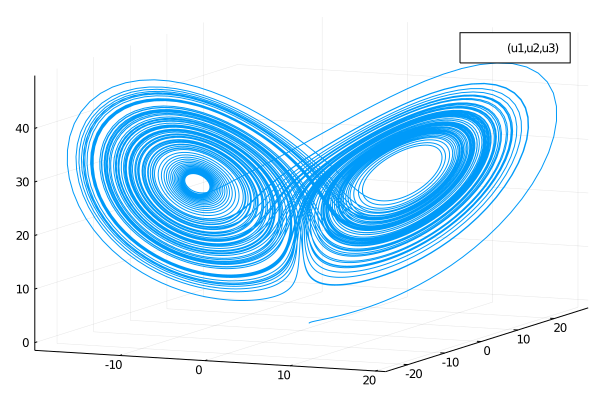

In [19]:
gr()
plot(sol,vars=(1,2,3))

In [21]:
using Psychro
using Unitful

In [22]:
println(volume(MoistAir, 20.0u"°C", DewPoint, 60.0u"°F", 1.0u"atm", u"cm^3/lb"))
println(wetbulb(MoistAir, 20.0u"°C", DewPoint, 60.0u"°F", 1.0u"atm"))
println(relhum(MoistAir, 20.0u"°C", DewPoint, 60.0u"°F", 1.0u"atm"))


383282.6011056348 cm^3 lb^-1
17.134466939662275 °C
0.755640835595789


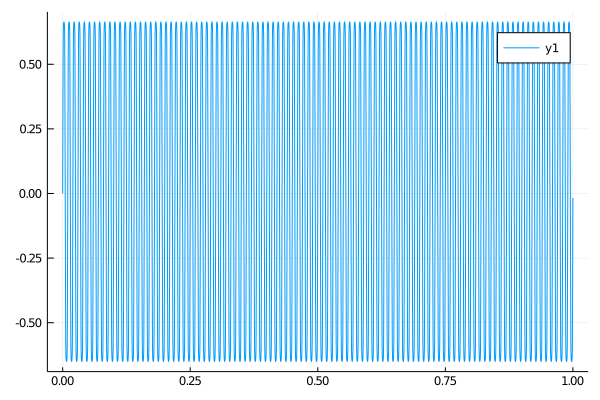

In [23]:
using ACME

circ = @circuit begin
    j_in = voltagesource(), [-] ⟷ gnd
    r1 = resistor(1e3), [1] ⟷ j_in[+]
    c1 = capacitor(47e-9), [1] ⟷ r1[2], [2] ⟷ gnd
    d1 = diode(is=1e-15), [+] ⟷ r1[2], [-] ⟷ gnd
    d2 = diode(is=1.8e-15), [+] ⟷ gnd, [-] ⟷ r1[2]
    j_out = voltageprobe(), [+] ⟷ r1[2], [-] ⟷ gnd
end
model = DiscreteModel(circ, 1/4410)
t = 1/44100 * (0:44099)'
y = run!(model, sin.(2π*100 .* t));
plot(t[1,:],y[1,:])

In [26]:
using PyCall

In [27]:
math = pyimport("math")
println(math.sin(1))

np = pyimport("numpy")
nprand = pyimport("numpy.random")
nprand.randn(3,4)


0.8414709848078965


3×4 Array{Float64,2}:
 0.402438   0.00215392   1.24917    -0.291974
 1.63742   -0.49273     -0.0018262   0.522377
 1.17184    0.505693     0.11604    -1.42486

In [30]:
using LinearAlgebra, SpecialFunctions, Plots, ApproxFun
x = Fun(identity,0..10)
f = sin(x^2)
g = cos(x)

Fun(Chebyshev(0..10),[-0.05037748828223824, -0.6282471738193445, -0.02641752529939319, -0.6996910463813416, 0.22195565278327428, 0.5008280175468399, -0.07434713931875803, -0.10236787078571936, 0.01044172796045064, 0.010587067010913753  …  -4.1863293741963567e-10, 1.5716757540826944e-11, 6.412940310800903e-12, -2.1829925116784714e-13, -8.114196016050454e-14, 2.5268751058932945e-15, 8.625777787526683e-16, -2.4745528200200695e-17, -7.548648766675401e-18, -2.0553989296917155e-19])

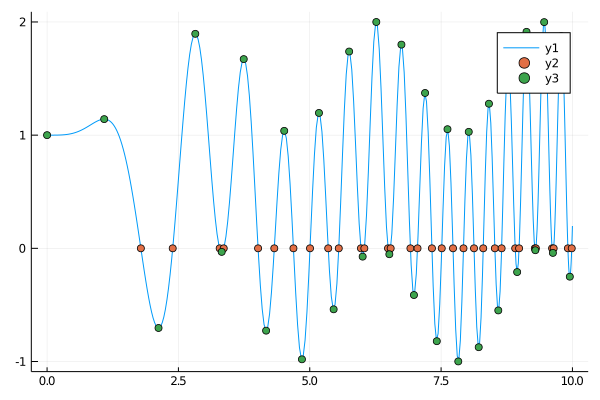

In [31]:
h = f + g^2
r = roots(h)
rp = roots(h')

using Plots
plot(h)
scatter!(r,h.(r))
scatter!(rp,h.(rp))